# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Institut

- Nama: Dewa Bagus Putu Arya Dhananjaya
- Email: dewadhanan@gmail.com
- Id Dicoding: dewadhanan25

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

## Data Understanding

In [2]:
df = pd.read_csv('data.csv', delimiter=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
df.duplicated().sum()
print(f'Number of duplicate data: {df.duplicated().sum()}')

Number of duplicate data: 0


In [6]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [7]:
df.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


Berdasarkan hasil **df.nunique()**, setiap variabel dalam dataset memiliki variasi nilai yang bermakna dan tidak ada kolom yang hanya memiliki satu nilai unik. Hal ini menunjukkan bahwa seluruh fitur bersifat informatif dan layak digunakan dalam proses pemodelan.

Beberapa variabel seperti `Gender`, `Scholarship_holder`, `Debtor`, `Displaced`, dan `International` memiliki dua nilai unik, sehingga termasuk variabel biner. Sementara itu, variabel seperti `Course`, `Application_mode`, serta pekerjaan dan kualifikasi orang tua memiliki banyak kategori yang menunjukkan bahwa variabel tersebut bersifat kategorikal dengan beberapa kelas.

Variabel numerik seperti `Admission_grade` serta nilai pada semester 1 dan semester 2 memiliki jumlah nilai unik yang tinggi, yang menandakan data bersifat kontinu dan memiliki variasi yang baik. Variabel target `Status` memiliki tiga nilai unik, sehingga permasalahan ini termasuk dalam klasifikasi multi-kelas.

### Exploratory Data Analysis

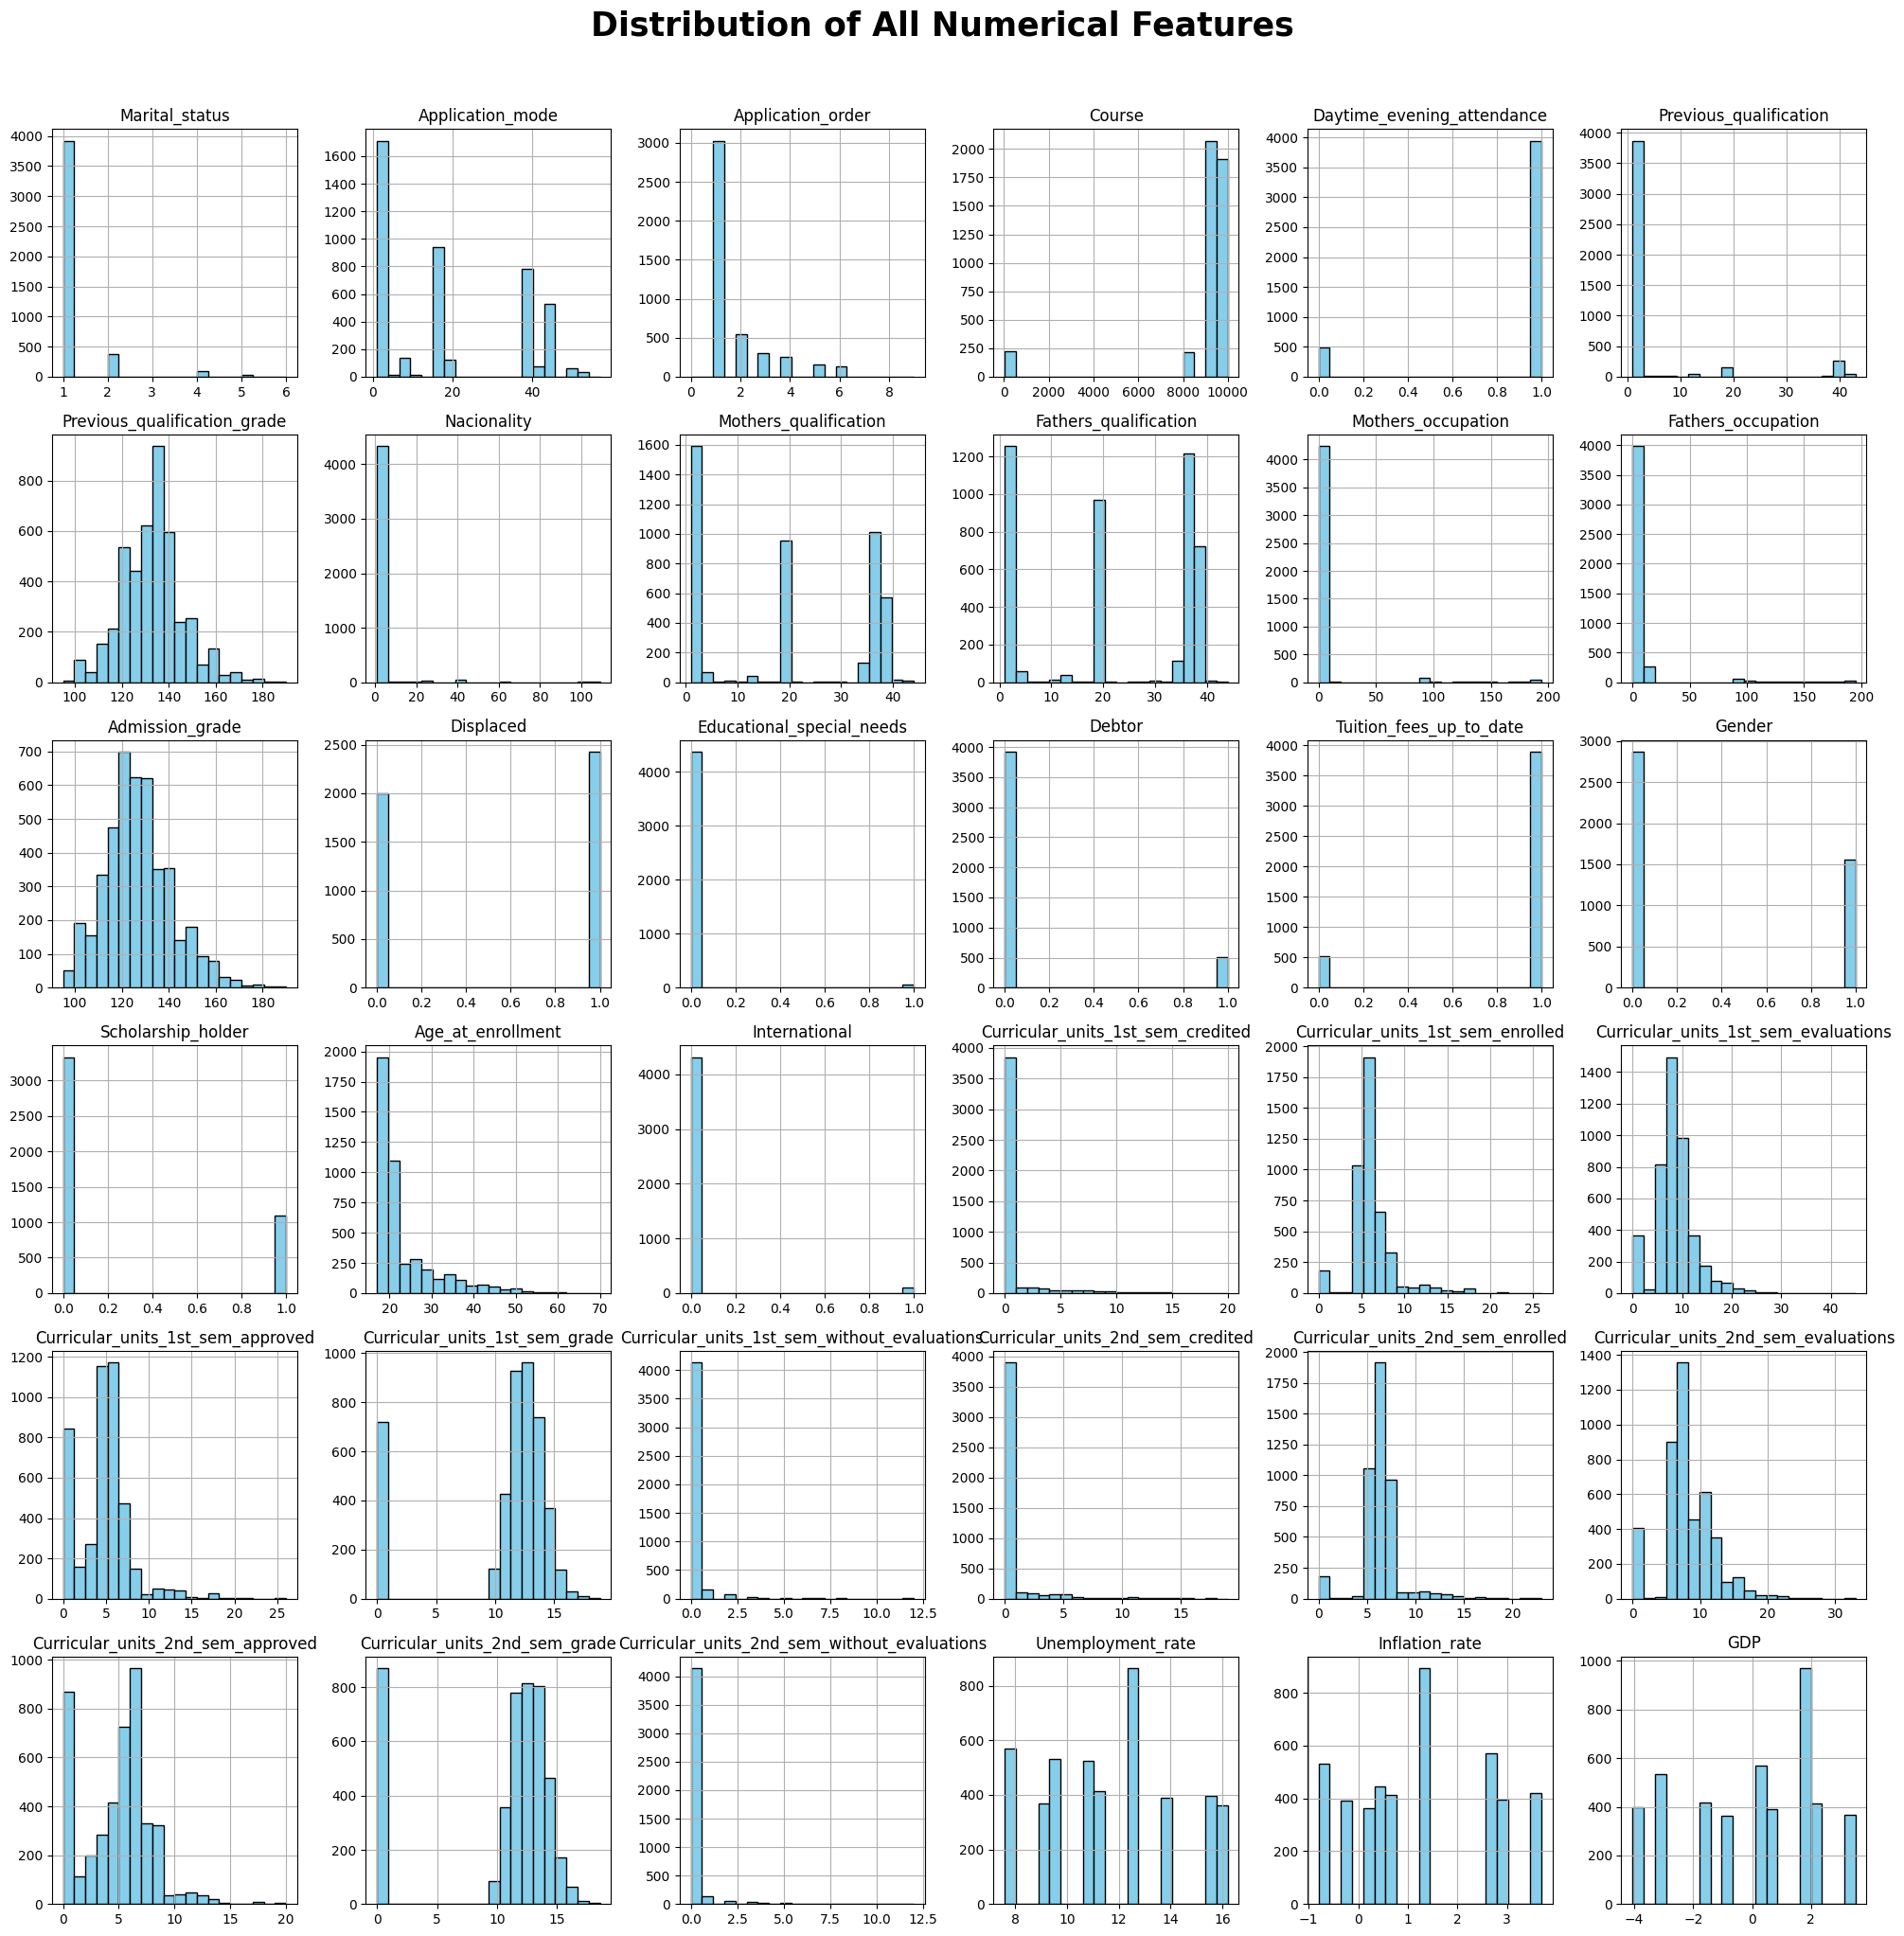

In [8]:
# Mengambil kolom numerik saja (menghindari kolom 'Status' yang teks)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Membuat grid histogram untuk semua fitur numerik
df_numeric.hist(figsize=(20, 20), color='skyblue', edgecolor='black', bins=20)

plt.suptitle('Distribution of All Numerical Features', fontsize=25, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

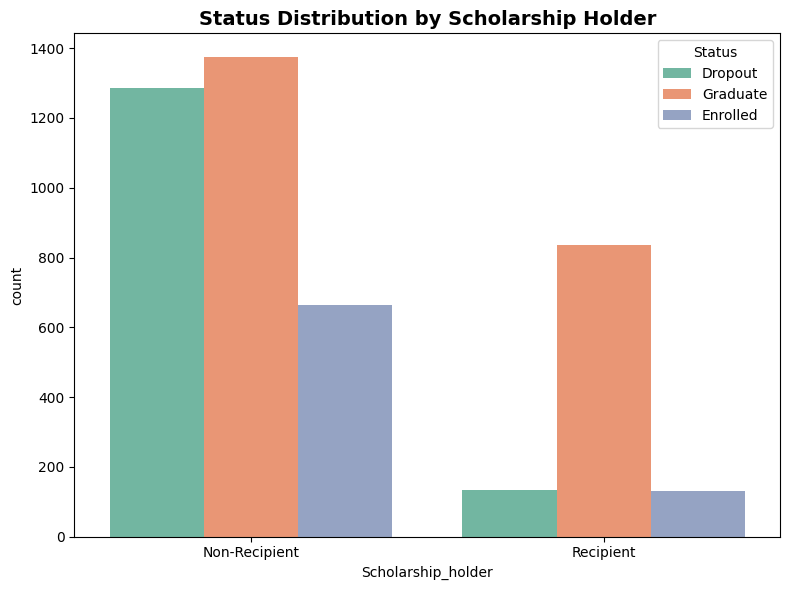

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Scholarship_holder', hue='Status', palette='Set2')

plt.title('Status Distribution by Scholarship Holder', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Non-Recipient', 'Recipient'])

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, distribusi status akademik berdasarkan kepemilikan beasiswa menunjukkan bahwa penerima beasiswa memiliki tingkat kelulusan lebih tinggi dibandingkan non-penerima. Jumlah dropout dan masih terdaftar (enrolled) pada kelompok penerima beasiswa relatif lebih rendah. Hal ini mengindikasikan bahwa beasiswa berperan positif dalam mendukung keberhasilan studi mahasiswa.

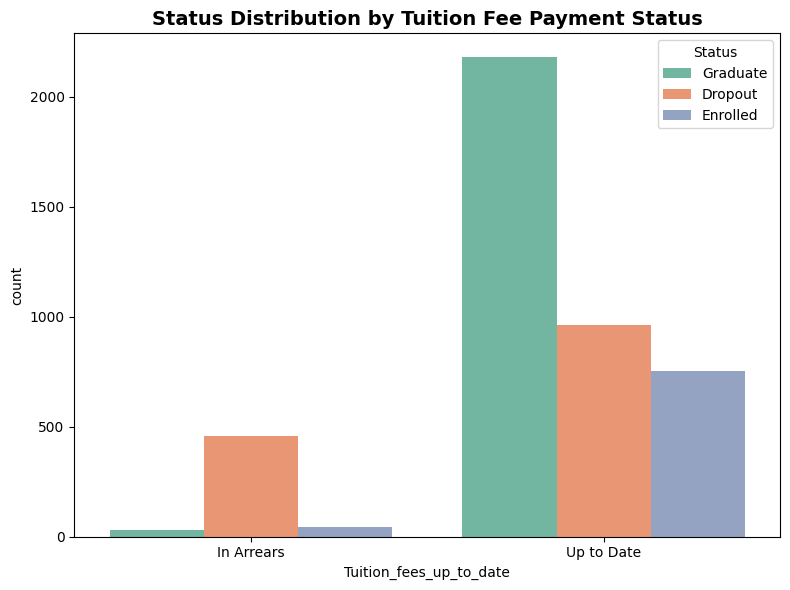

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tuition_fees_up_to_date', hue='Status', palette='Set2')

plt.title('Status Distribution by Tuition Fee Payment Status', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['In Arrears', 'Up to Date'])

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, distribusi status akademik berdasarkan kondisi pembayaran biaya kuliah menunjukkan pola yang jelas. Mahasiswa dengan status pembayaran tertunggak (In Arrears) didominasi oleh kategori Dropout, sementara jumlah yang lulus sangat sedikit. Sebaliknya, mahasiswa dengan pembayaran lancar (Up to Date) sebagian besar berhasil Graduate, dengan jumlah dropout dan masih terdaftar lebih rendah. Hal ini menegaskan bahwa keteraturan dalam pembayaran biaya kuliah berkorelasi positif dengan keberhasilan studi.

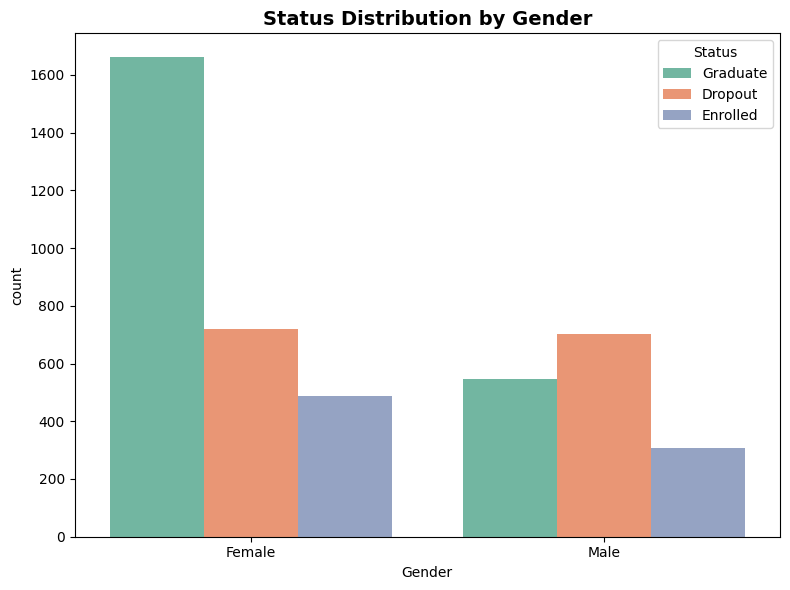

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Status', palette='Set2')

plt.title('Status Distribution by Gender', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Female', 'Male'])

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, distribusi status akademik berdasarkan gender menunjukkan pola yang berbeda. Pada mahasiswa perempuan, jumlah Graduate paling tinggi, diikuti oleh Dropout dan Enrolled. Sebaliknya, pada mahasiswa laki-laki, jumlah Dropout mendominasi, disusul oleh Graduate, lalu Enrolled. Temuan ini mengindikasikan adanya perbedaan tren capaian akademik antara gender, yang dapat menjadi bahan pertimbangan dalam kebijakan pendidikan.

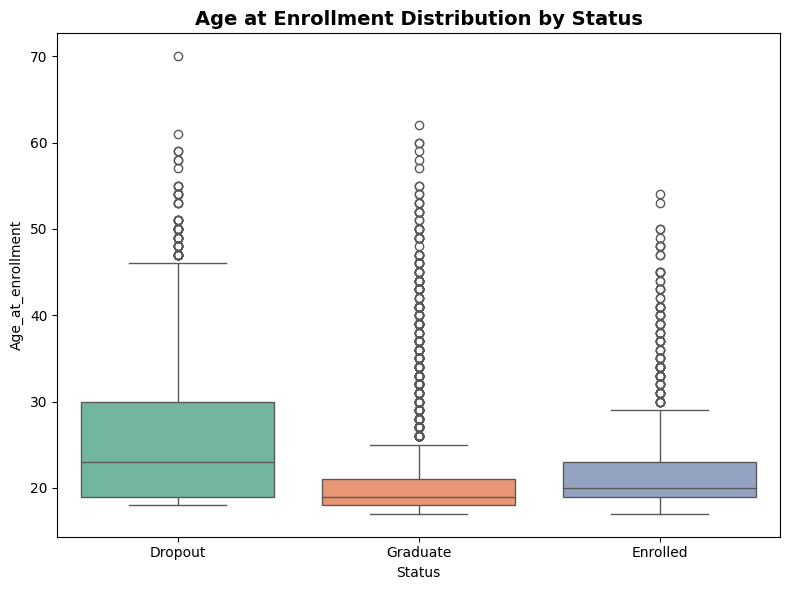

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Status', y='Age_at_enrollment', palette='Set2')

plt.title('Age at Enrollment Distribution by Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, diistribusi usia saat masuk berdasarkan status akademik menunjukkan perbedaan pola yang cukup jelas. Mahasiswa dengan status Dropout memiliki rentang usia lebih lebar dengan median sekitar 22 tahun dan banyak outlier hingga usia lanjut. Sementara itu, mahasiswa Graduate cenderung berusia lebih muda dengan median sekitar 19 tahun dan distribusi lebih sempit. Mahasiswa yang masih Enrolled memiliki median sekitar 20 tahun dengan pola mirip Graduate, namun dengan outlier lebih sedikit. Temuan ini menegaskan bahwa usia saat masuk dapat memengaruhi kecenderungan capaian akademik.

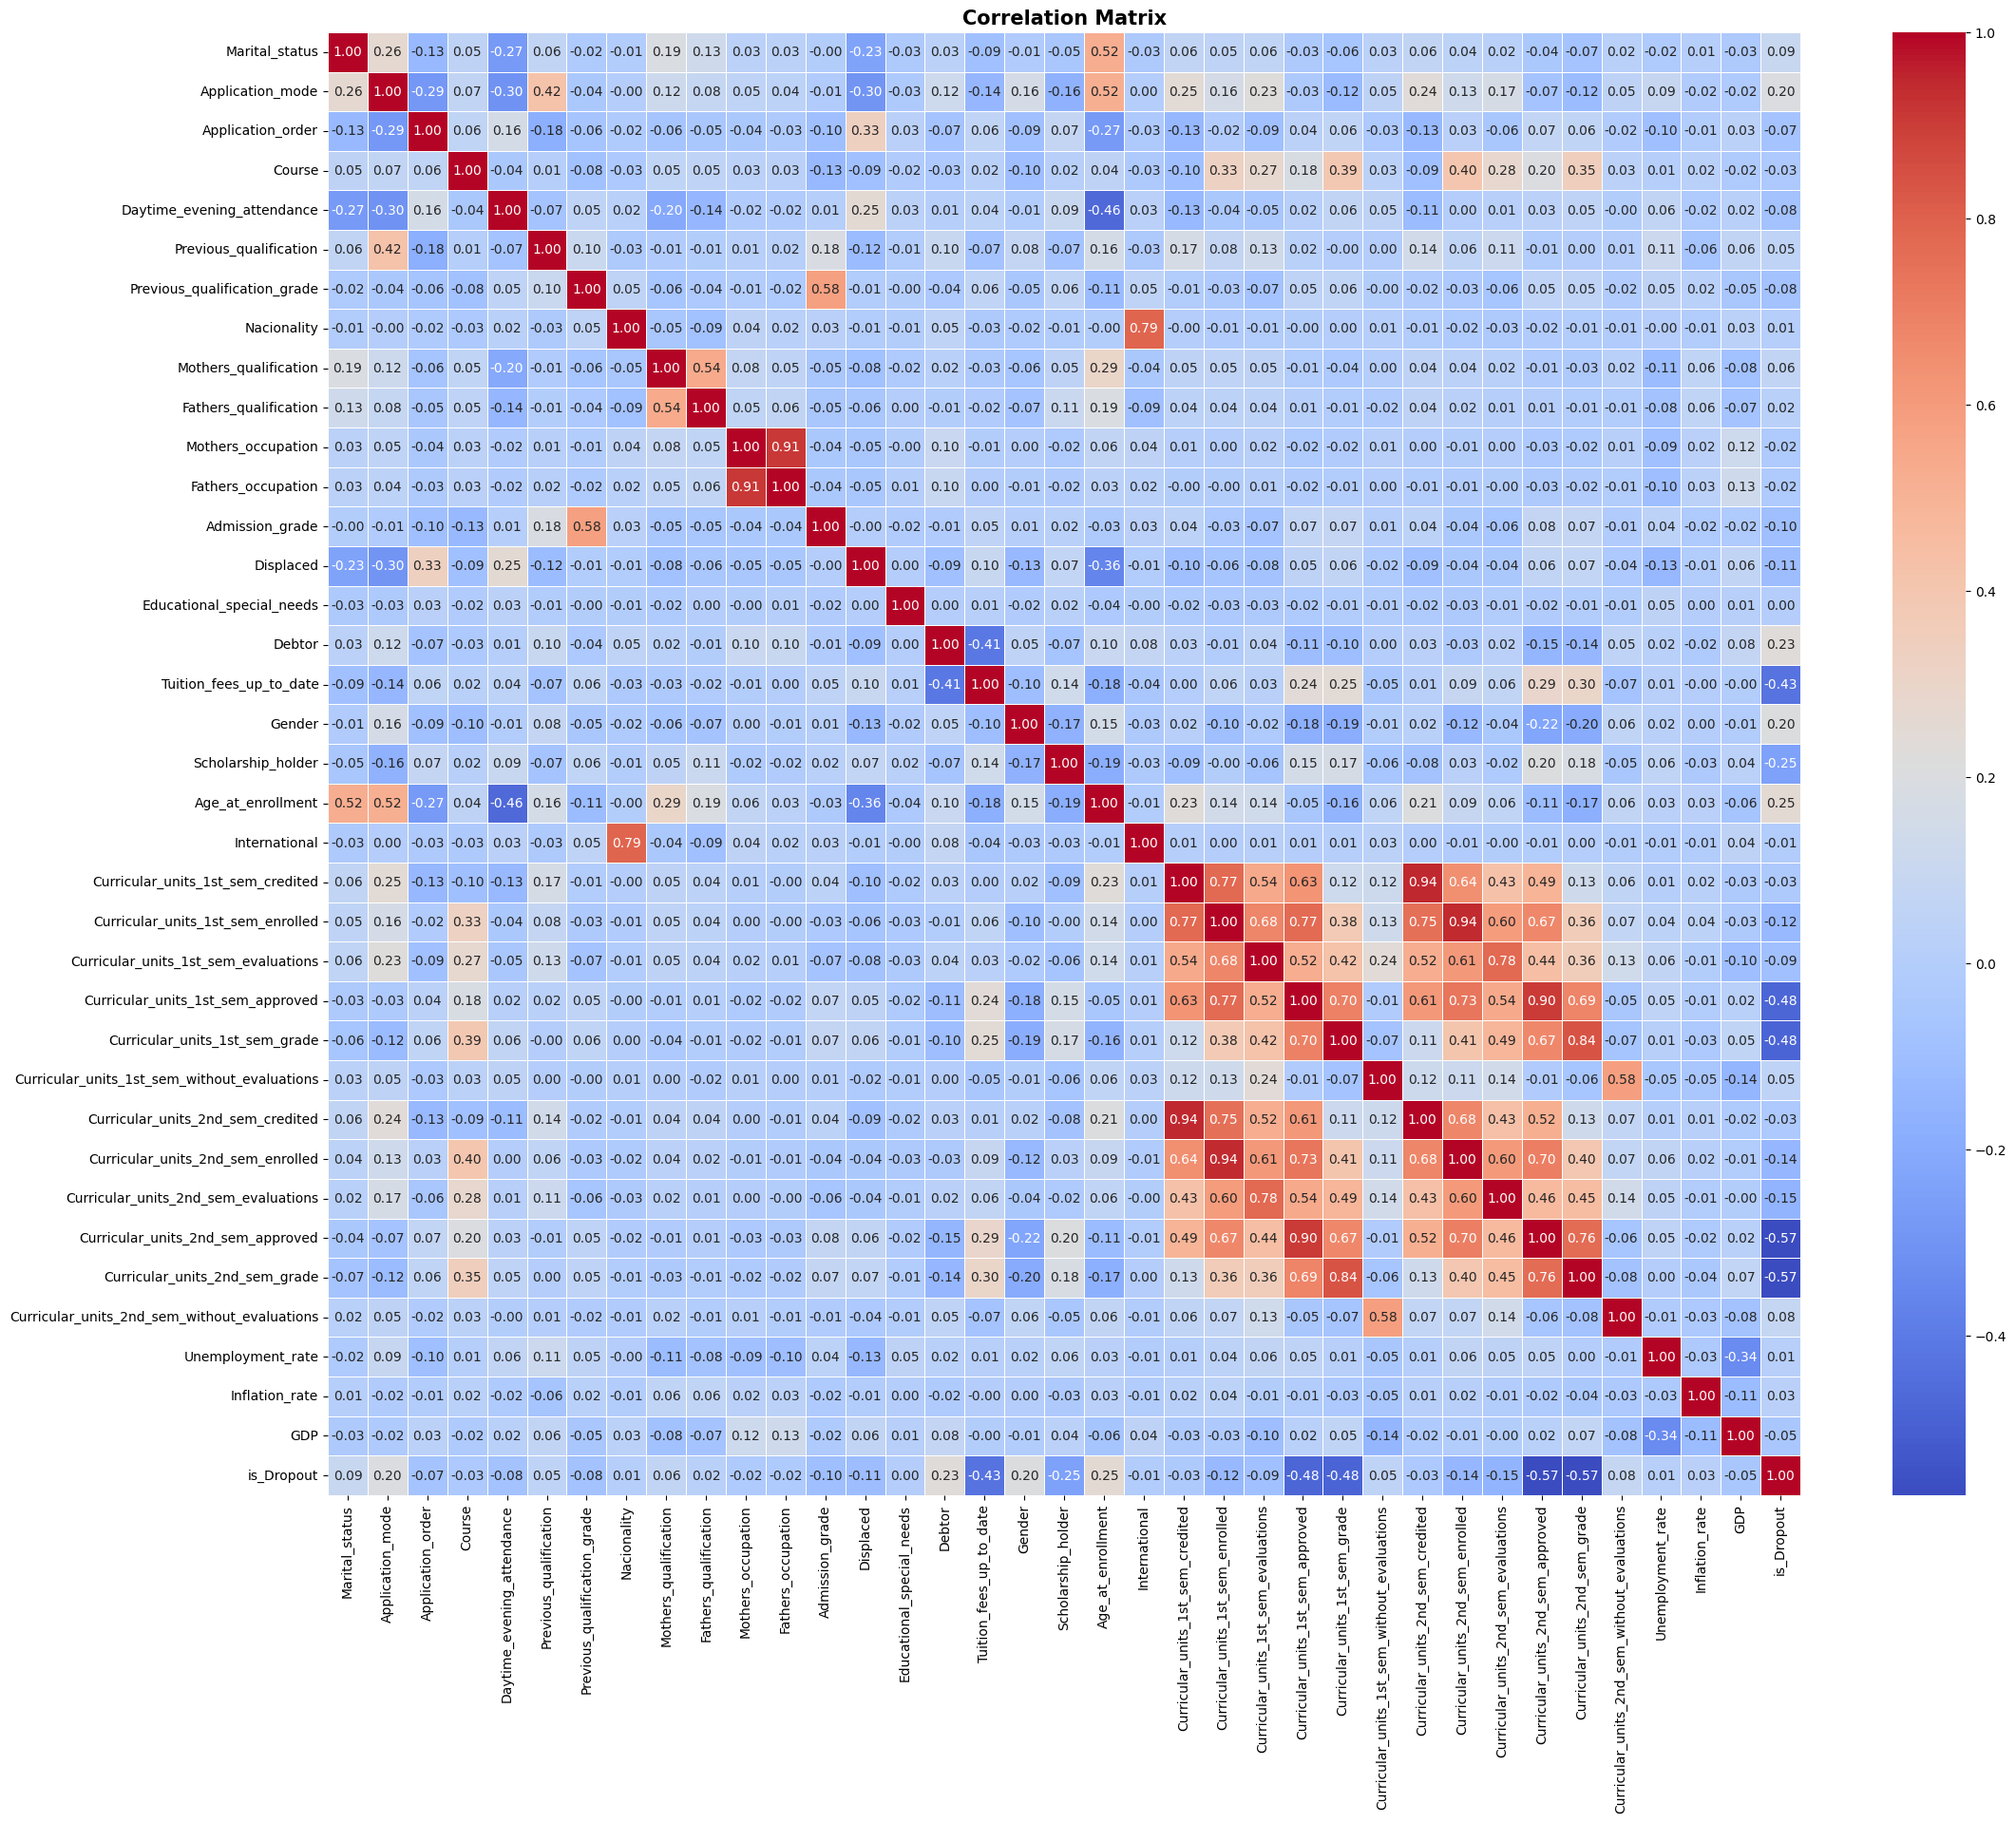

In [13]:
# Menyiapkan data: Ubah Status menjadi numerik (fokus pada Dropout)
df_corr = df.copy()
df_corr['is_Dropout'] = df_corr['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(25, 20))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

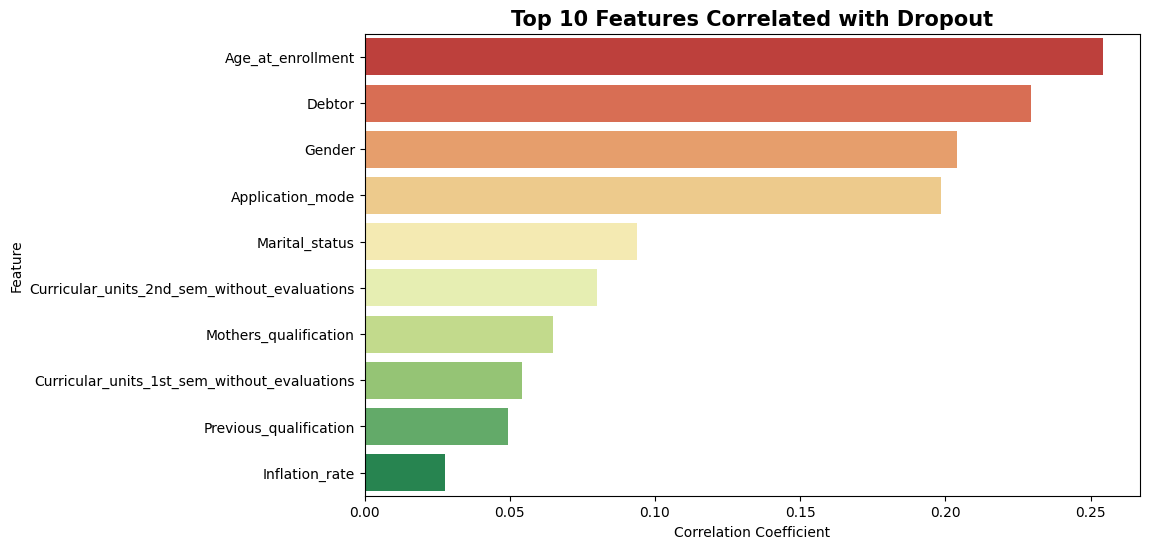

In [14]:
dropout_corr = corr_matrix['is_Dropout'].sort_values(ascending=False)
top_10_corr = dropout_corr.drop('is_Dropout').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette='RdYlGn')
plt.title('Top 10 Features Correlated with Dropout', fontsize=15, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

Visualisasi di atas menampilkan sepuluh fitur dengan korelasi tertinggi terhadap kejadian dropout. Faktor yang paling berhubungan positif adalah `Age_at_enrollment`, `Debtor`, `Gender`, dan `Application_mode`, yang menunjukkan bahwa semakin tinggi nilai pada variabel-variabel tersebut, semakin besar kecenderungan mahasiswa mengalami dropout. Sementara faktor lain seperti `Marital_status`, `Mothers_qualification`, dan beberapa variabel akademik awal juga memiliki korelasi positif meski lebih lemah. Temuan ini menegaskan bahwa aspek demografis dan finansial memainkan peran penting dalam risiko dropout, sehingga dapat menjadi fokus utama intervensi kebijakan pendidikan.

In [38]:
df_top_10 = top_10_corr.reset_index()
df_top_10.columns = ['Feature', 'Correlation_Coefficient']

df_top_10['Correlation_Coefficient'] = df_top_10['Correlation_Coefficient'].round(3)

df_top_10.to_csv('top_10_dropout_factors.csv', index=False, float_format="%.3f")

## Data Preparation / Preprocessing

In [16]:
# Encoding Target Variable (Status)
# Mengubah Dropout, Enrolled, Graduate menjadi angka 0, 1, 2
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Mapping Status: {mapping}")

Mapping Status: {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


In [17]:
X = df.drop('Status', axis=1)
y = df['Status']

In [31]:
X.to_csv('data_fix.csv', index=False)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [19]:
print("\n===== Class Distribution BEFORE SMOTE =====")
print(pd.Series(y_train).value_counts())
print("\nPercentage:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)


===== Class Distribution BEFORE SMOTE =====
Status
2    1546
0     994
1     556
Name: count, dtype: int64

Percentage:
Status
2    49.935401
0    32.105943
1    17.958656
Name: proportion, dtype: float64


In [20]:
scaler = StandardScaler()

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [21]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [22]:
print("\n===== Class Distribution AFTER SMOTE =====")
print(pd.Series(y_train_smote).value_counts())
print("\nPercentage:")
print(pd.Series(y_train_smote).value_counts(normalize=True) * 100)


===== Class Distribution AFTER SMOTE =====
Status
2    1546
0    1546
1    1546
Name: count, dtype: int64

Percentage:
Status
2    33.333333
0    33.333333
1    33.333333
Name: proportion, dtype: float64


## Modeling

In [23]:
rf = RandomForestClassifier(random_state=42)

param_rf = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    rf,
    param_rf,
    cv=5,
    scoring='roc_auc_ovr',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_smote, y_train_smote)
best_rf = grid_rf.best_estimator_

print("Random Forest Best Params:", grid_rf.best_params_)
print("Random Forest Best Estimator:", best_rf)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Best Estimator: RandomForestClassifier(n_estimators=300, random_state=42)


In [24]:
svm = SVC(probability=True, random_state=42)

param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

grid_svm = GridSearchCV(
    svm,
    param_svm,
    cv=5,
    scoring='roc_auc_ovr',
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train_smote, y_train_smote)
best_svm = grid_svm.best_estimator_

print("SVM Best Params:", grid_svm.best_params_)
print("SVM Best Estimator:", best_svm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM Best Params: {'C': 10, 'kernel': 'rbf'}
SVM Best Estimator: SVC(C=10, probability=True, random_state=42)


In [25]:
xgb = XGBClassifier(
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

param_xgb = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1]
}

grid_xgb = GridSearchCV(
    xgb,
    param_xgb,
    cv=5,
    scoring='roc_auc_ovr',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train_smote, y_train_smote)
best_xgb = grid_xgb.best_estimator_

print("XGBoost Best Params:", grid_xgb.best_params_)
print("XGBoost Best Estimator:", best_xgb)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
XGBoost Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)


In [26]:
# MENAMBAHKAN ALGORITMA ENSEMBLE (VOTING)
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('svm', best_svm),
        ('xgb', best_xgb)
    ],
    voting='soft'
)

ensemble_model.fit(X_train_smote, y_train_smote)

print("Ensemble Model:", ensemble_model)

Ensemble Model: VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=10, probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metri...
                                            feature_weights=None, gamma=None,
                          

## Evaluation


EVALUATION - Random Forest
Accuracy: 0.7725903614457831

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.81      0.74      0.77       427
    Enrolled       0.52      0.51      0.52       238
    Graduate       0.83      0.89      0.86       663

    accuracy                           0.77      1328
   macro avg       0.72      0.71      0.72      1328
weighted avg       0.77      0.77      0.77      1328



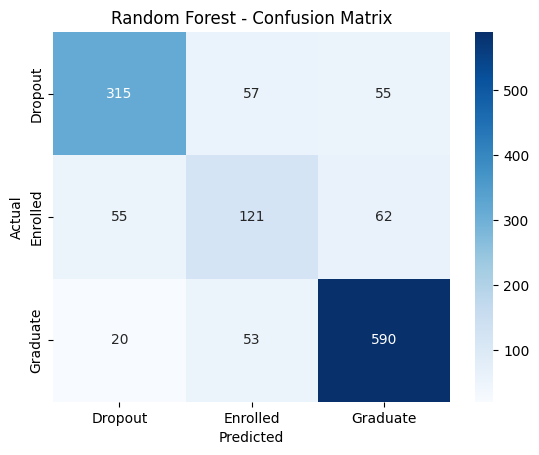

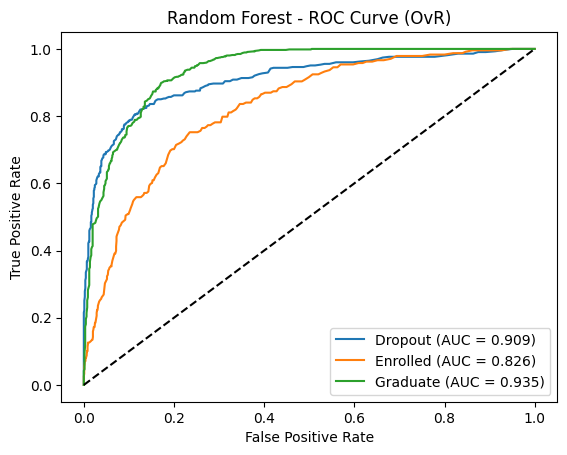

ROC AUC (OvR): 0.8902233541537603

EVALUATION - SVM
Accuracy: 0.7228915662650602

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.77      0.70      0.73       427
    Enrolled       0.41      0.47      0.44       238
    Graduate       0.82      0.83      0.83       663

    accuracy                           0.72      1328
   macro avg       0.67      0.67      0.67      1328
weighted avg       0.73      0.72      0.73      1328



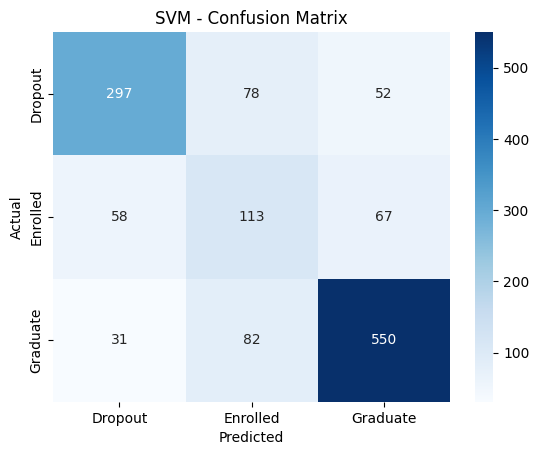

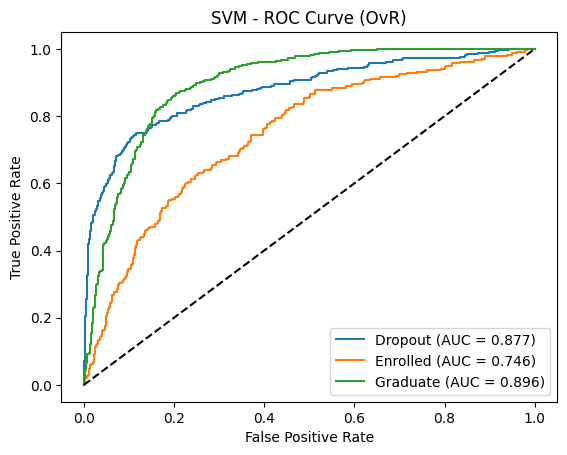

ROC AUC (OvR): 0.8395086150527257

EVALUATION - XGBoost
Accuracy: 0.7725903614457831

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.82      0.74      0.78       427
    Enrolled       0.52      0.50      0.51       238
    Graduate       0.83      0.89      0.86       663

    accuracy                           0.77      1328
   macro avg       0.72      0.71      0.72      1328
weighted avg       0.77      0.77      0.77      1328



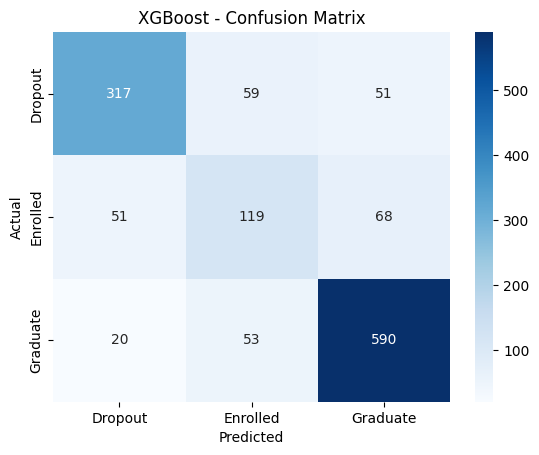

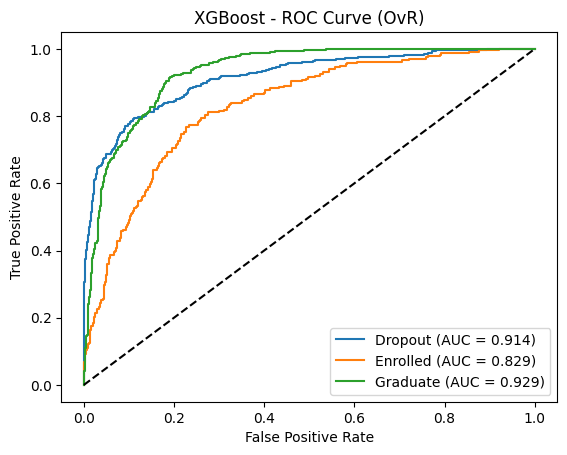

ROC AUC (OvR): 0.890941188877718

EVALUATION - Ensemble (Voting)
Accuracy: 0.7778614457831325

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.82      0.74      0.78       427
    Enrolled       0.54      0.51      0.52       238
    Graduate       0.83      0.90      0.87       663

    accuracy                           0.78      1328
   macro avg       0.73      0.72      0.72      1328
weighted avg       0.77      0.78      0.77      1328



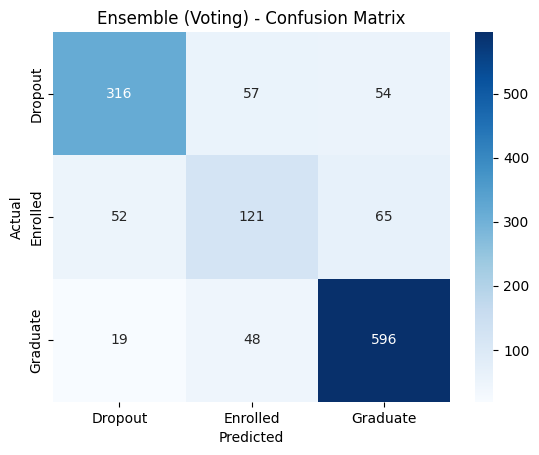

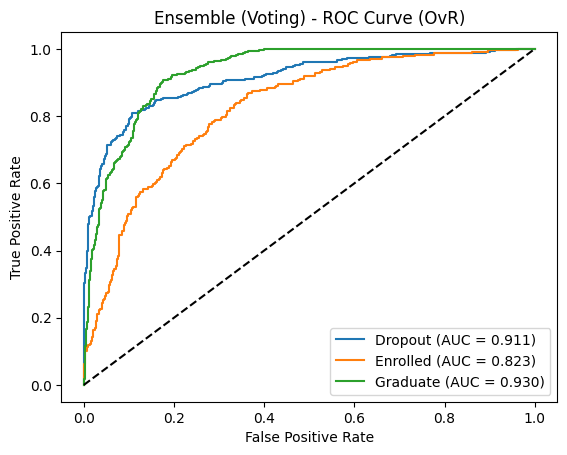

ROC AUC (OvR): 0.8881023125763724


In [27]:
# Mapping Status
status_mapping = {
    0: "Dropout",
    1: "Enrolled",
    2: "Graduate"
}

best_models = {
    "Random Forest": best_rf,
    "SVM": best_svm,
    "XGBoost": best_xgb,
    "Ensemble (Voting)": ensemble_model
}

evaluation_results = []

for name, model in best_models.items():

    print("\n====================================")
    print(f"EVALUATION - {name}")
    print("====================================")

    # Prediction
    y_pred = model.predict(X_test_scaled)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:
        y_score = model.decision_function(X_test_scaled)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    # Classification Report
    print("\nClassification Report:\n")
    print(
        classification_report(
            y_test,
            y_pred,
            target_names=[
                status_mapping[i] for i in sorted(status_mapping.keys())
            ]
        )
    )

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure()
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=[
            status_mapping[i] for i in sorted(status_mapping.keys())
        ],
        yticklabels=[
            status_mapping[i] for i in sorted(status_mapping.keys())
        ]
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve Multiclass
    classes = sorted(status_mapping.keys())
    y_test_bin = label_binarize(y_test, classes=classes)

    plt.figure()

    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)

        plt.plot(
            fpr,
            tpr,
            label=f"{status_mapping[class_label]} (AUC = {roc_auc:.3f})"
        )

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve (OvR)")
    plt.legend()
    plt.show()

    # Overall ROC AUC
    roc_auc_overall = roc_auc_score(
        y_test,
        y_score,
        multi_class="ovr"
    )

    print("ROC AUC (OvR):", roc_auc_overall)

    evaluation_results.append([name, acc, roc_auc_overall])

In [28]:
results_df = pd.DataFrame(
    evaluation_results,
    columns=["Model", "Accuracy", "ROC_AUC_OvR"]
)

print("\nSUMMARY OF RESULTS:")
print(results_df.sort_values(by="ROC_AUC_OvR", ascending=False))

best_model_row = results_df.sort_values(
    by="ROC_AUC_OvR",
    ascending=False
).iloc[0]

best_model_name = best_model_row["Model"]
best_model = best_models[best_model_name]

print("\nBEST MODEL:", best_model_name)


SUMMARY OF RESULTS:
               Model  Accuracy  ROC_AUC_OvR
2            XGBoost  0.772590     0.890941
0      Random Forest  0.772590     0.890223
3  Ensemble (Voting)  0.777861     0.888102
1                SVM  0.722892     0.839509

BEST MODEL: XGBoost


In [33]:
# Save encoder
joblib.dump(le, "encoder.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save best model
joblib.dump(best_model, "best_model.pkl")

print("\nAll files have been successfully saved:")
print("encoder.pkl")
print("scaler.pkl")
print("best_model.pkl")


All files have been successfully saved:
encoder.pkl
scaler.pkl
best_model.pkl


In [30]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.4
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.2.16.0.48.25
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.8
autograd==1.8.0
babel==2.18.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.35.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.2.0
blosc2==4.0.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==7.0.1
catalogue==2.0.10
certifi==2026.1.4
cf